# Численные методы
### Задание 6. 

###### По заданным значениям $x$ и $y$ найти прямую $y=a_0+a_1 x$ и параболу $y=a_0+a_1  x+ a_2 x^2$ методом наименьших квадратов. Найти погрешность. Построить прямую и кривую в той же системе координат, где нанесены данные точки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.array([0.61, 1.28, 1.72, 2.32, 3.07, 4.16, 6.95, 7.15, 7.28, 7.82, 8.22, 9.09, 9.75])
y = np.array([0.59, 2.68, 4.54, 6.58, 8.69, 12.08, 21.98, 21.75, 22.18, 24.84, 25.96, 28.64, 30.45])
# x = np.array([0.18, 0.67, 0.84, 1.40, 2.35, 2.42, 6.60, 6.72, 6.93, 8.57, 9.41, 9.79])
# y = np.array([0.96, 1.97, 2.11, 3.30, 5.04, 5.39, 12.47, 13.03, 13.69, 16.59, 18.22, 18.33])

In [3]:
def syst_eq_solve_lin(x, y):
    matrix_1 = np.array([[len(x)+1, np.sum(x)],
                        [np.sum(x), np.sum(np.square(x))]])
    vector_1 = np.array([np.sum(y), np.sum(x) * np.sum(y)])
    return np.linalg.solve(matrix_1, vector_1)

a0, a1 = syst_eq_solve_lin(x, y)

table = pd.DataFrame(columns=["a0", "a1"], data=[syst_eq_solve_lin(x, y)])

In [4]:
table

,a0,a1
0,-429.452449,89.646994


In [5]:
y1 = []

mas = []

for i in range(-10, 15):
    y1.append(a0 + a1 * i*0.1)
    mas.append(i*0.1)

In [6]:
def syst_eq_solve_square(x, y):
    x_2 = np.power(x, 2)
    x_3 = np.power(x, 3)
    x_4 = np.power(x, 4)


    matrix_1 = np.array([
        [len(x) + 1, np.sum(x), np.sum(x_2)],
        [np.sum(x), np.sum(x_2), np.sum(x_3)],
        [np.sum(x_2), np.sum(x_3), np.sum(x_4)]
    ])
    vector_1 = np.array(
        [
            np.sum(y),
            np.sum(x) * np.sum(y),
            np.sum(x_2) * np.sum(y)
        ]
    )
    return np.linalg.solve(matrix_1, vector_1)

a1, a2, a3 = syst_eq_solve_square(x, y)

table = pd.DataFrame(columns=["a0", "a1", "a2"], data=[syst_eq_solve_square(x, y)])

In [7]:
table

,a0,a1,a2
0,-1001.709703,536.985992,-46.464812


In [8]:

y2 = []

mas2 = []

for i in range(-10, 15):
    y2.append(a0 + a1 * i*0.1 + a2 * a3 * (i*0.1)**2)
    mas2.append(i*0.1)

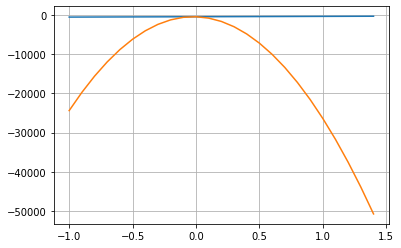

In [9]:
plt.grid()
plt.plot(mas, y1)
plt.plot(mas2, y2)